In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset = pd.read_csv('../salary_level.csv')
dataset.head(3)

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [3]:
dataset.isnull().sum()

position    0
level       0
salary      0
dtype: int64

In [4]:
x = dataset.iloc[:, 1:-1]
x

,level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y = dataset['salary']
y

0     45000
1     50000
2     60000
3     80000
4    110000
5    150000
6    200000
7    220000
8    250000
9    500000
Name: salary, dtype: int64

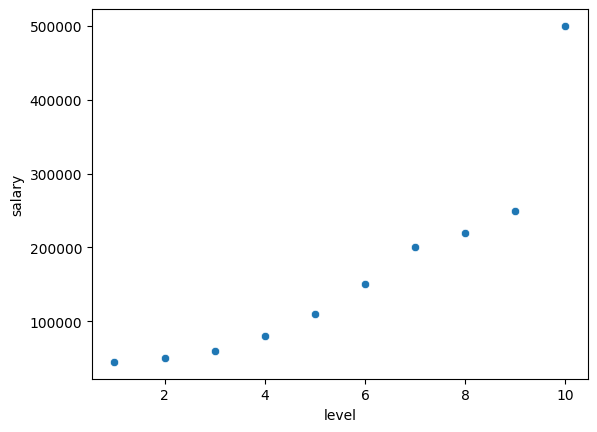

In [6]:
sns.scatterplot(x='level', y='salary', data=dataset)
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=2)

In [9]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train) 

DecisionTreeRegressor()

In [10]:
dt.score(x_test, y_test) * 100

-447.6566213518395

In [14]:
df = {
  "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'possion'],
  "splitter": ['best', 'random'],
  "max_depth": [i for i in range(2, 20)]
}

In [18]:
gd = GridSearchCV(DecisionTreeRegressor(), param_grid=df, cv=2)
gd.fit(x_train, y_train)

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Prati\AppData\Local\Programs\Python\Python3

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'possion'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [19]:
gd.score(x_test, y_test) * 100

-447.6566213518395

In [20]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}

In [ ]:
# similary you can use randomized search cv to get the best params for the accuracy
# understood how you can use this feature to get the best hyper parameter for the model for best output just you have to give a list of all params and it will train the model on all of that and will return the best with the accuracty